In [6]:
# Read the June 15th power data from the data folder.
import pandas as pd
df = pd.read_csv("../data/2012-06-power-survey-london.csv")

In [7]:
df.head()

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,M_count,N_count,O_count,P_count,Q_count,U_count,count,sigma,mean,std
0,2012-06-01 00:00:00,17.777,0.765,7.614,29.935,126.537,47.498,9.005,27.533,1.598,...,46,71,44,68,521,18,2940,391.070,0.133017,0.161264
1,2012-06-01 00:30:00,17.506,0.872,7.184,25.912,131.720,41.897,8.174,22.699,1.566,...,46,71,44,68,521,18,2943,397.867,0.135191,0.213922
2,2012-06-01 01:00:00,16.350,0.851,6.478,25.622,114.753,40.914,7.299,20.513,2.112,...,46,71,44,68,521,18,2943,360.190,0.122389,0.183756
3,2012-06-01 01:30:00,14.346,0.807,5.959,23.885,102.032,41.101,7.358,19.862,1.569,...,46,71,44,68,521,18,2943,322.754,0.109668,0.150751
4,2012-06-01 02:00:00,14.358,0.674,5.723,23.187,95.854,37.432,7.097,19.033,1.652,...,46,71,44,68,521,18,2943,304.610,0.103503,0.134089


In [8]:
from datetime import datetime
#type(df['datetime'][0])
#date_time_obj = datetime.strptime(df['datetime'][0], "%m/%d/%Y %H:%M")

# Create two functions that will allow us to create data based on the data in each row.

def dayCalc(row):
    return pd.to_datetime(row['datetime']).day

def tstampCalc(row):
    return f"{pd.to_datetime(row['datetime']).hour}:{pd.to_datetime(row['datetime']).minute:02}"
    
# Create new columns for the day of the month and also a column for the time stamp (e.g. 20:30).

df['day'] = df.apply(dayCalc, axis = 1)
df['tstamp'] = df.apply(tstampCalc, axis = 1)

# Could also do it with a lambda.
#df['day'] = pd.to_datetime(df['datetime'])
#df['day'] = df.apply(lambda row: pd.to_datetime(row['datetime']).day, axis = 1)

In [9]:
# Create a dataframe representing energy consumption for June 15th, 2012, the day
# of the Sweden vs England Soccer game.

df_England_vs_Sweden = df.loc[df['day']==15]
df_England_vs_Sweden = df_England_vs_Sweden.set_index(df_England_vs_Sweden["tstamp"])
df_England_vs_Sweden.head(5)

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,O_count,P_count,Q_count,U_count,count,sigma,mean,std,day,tstamp
tstamp,,,,,,,,,,,,,,,,,,,,,
0:00,2012-06-15 00:00:00,16.173,1.399,6.138,31.801,125.994,49.776,9.488,25.279,1.775,...,43,65,522,19,2985,383.653,0.128527,0.161654,15,0:00
0:30,2012-06-15 00:30:00,11.894,0.932,6.174,26.125,132.452,41.043,6.974,19.600,1.366,...,38,62,461,15,2640,379.626,0.143798,0.264518,15,0:30
1:00,2012-06-15 01:00:00,11.601,0.885,5.876,26.665,118.076,37.832,7.351,19.864,1.703,...,38,62,461,15,2640,347.934,0.131793,0.245435,15,1:00
1:30,2012-06-15 01:30:00,11.339,0.856,5.829,22.591,105.767,36.597,7.069,19.983,1.628,...,38,62,461,15,2640,312.982,0.118554,0.191737,15,1:30
2:00,2012-06-15 02:00:00,11.899,0.882,5.526,21.686,100.792,31.311,6.640,18.963,1.484,...,38,62,461,15,2640,290.805,0.110153,0.167005,15,2:00


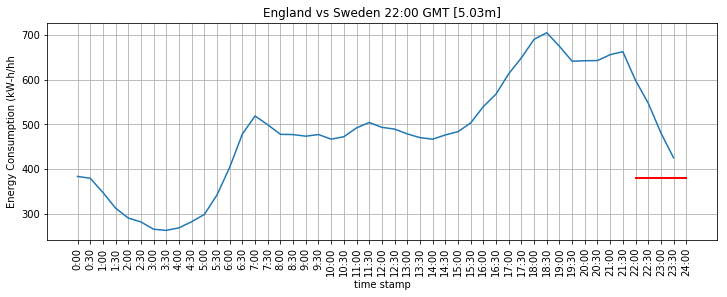

In [11]:
# Plot the day's energy consumption.

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,4))
plt.plot(df_England_vs_Sweden["tstamp"],df_England_vs_Sweden["sigma"])
plt.xticks(rotation='vertical')
plt.title("England vs Sweden 22:00 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['22:00', '24:00'], [380, 380], color='r', linestyle='-', linewidth=2)
plt.show()

In [12]:
# Create date series for each Acorn group.

# Acorn1 = A, B, C
# Acorn2 = D, E
# Acorn3 = F, G, H, I, J
# Acorn4 = K, L, M, N
# Acorn5 = O, P, Q

Acorn1  = df_England_vs_Sweden["A_sigma"] + df_England_vs_Sweden["B_sigma"] + df_England_vs_Sweden["C_sigma"]
Acorn2  = df_England_vs_Sweden["D_sigma"] + df_England_vs_Sweden["E_sigma"]
Acorn3  = df_England_vs_Sweden["F_sigma"] + df_England_vs_Sweden["G_sigma"] + df_England_vs_Sweden["H_sigma"] \
                                           + df_England_vs_Sweden["I_sigma"] + df_England_vs_Sweden["J_sigma"]
Acorn4  = df_England_vs_Sweden["K_sigma"] + df_England_vs_Sweden["L_sigma"] + df_England_vs_Sweden["M_sigma"] \
                                           + df_England_vs_Sweden["N_sigma"]
Acorn5  = df_England_vs_Sweden["O_sigma"] + df_England_vs_Sweden["P_sigma"] + df_England_vs_Sweden["Q_sigma"]

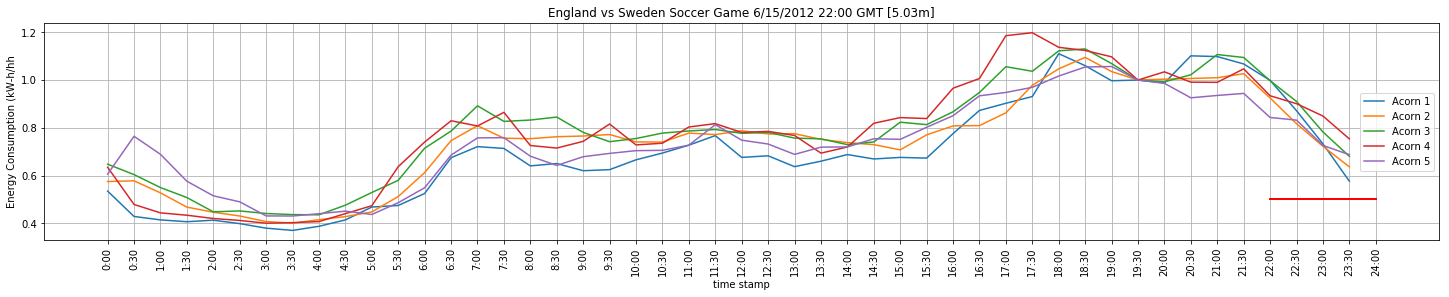

In [23]:
# Plot the day's energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(25,4))
hnd1, = plt.plot(df_England_vs_Sweden["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_England_vs_Sweden["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_England_vs_Sweden["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_England_vs_Sweden["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_England_vs_Sweden["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("England vs Sweden Soccer Game 6/15/2012 22:00 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['22:00', '24:00'], [0.5, 0.5], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()

In [16]:
# Normalize the energy consumption for each Acorn group using the timestamp 19:30 as the reference value.
# This is to compare trends amongst the groups.

Acorn1 = Acorn1 / Acorn1['19:30']
Acorn2 = Acorn2 / Acorn2['19:30']
Acorn3 = Acorn3 / Acorn3['19:30']
Acorn4 = Acorn4 / Acorn4['19:30']
Acorn5 = Acorn5 / Acorn5['19:30']

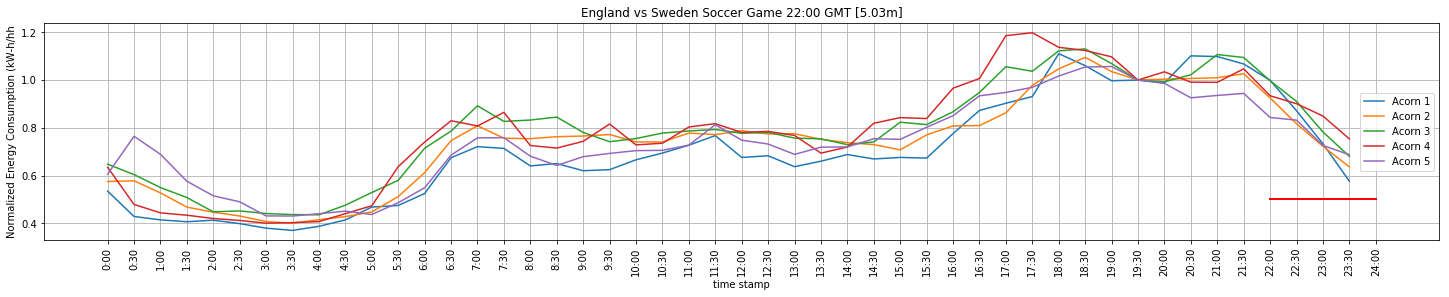

In [21]:
# Plot the day's normalized energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(25,4))
hnd1, = plt.plot(df_England_vs_Sweden["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_England_vs_Sweden["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_England_vs_Sweden["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_England_vs_Sweden["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_England_vs_Sweden["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("England vs Sweden Soccer Game 22:00 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Normalized Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['22:00', '24:00'], [0.5, 0.5], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()